# Coffee Shop Sales

<b>Data:</b> 
Transaction records for Maven Roasters, a fictitious coffee shop operating out of three NYC locations. Dataset includes the transaction date, timestamp and location, along with product-level details.



In [2]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

# visualisation style

sns.set_style('darkgrid')
sns.set_palette('RdBu')
%matplotlib inline

# ignoring warnings to make the code look more presentable 
warnings.filterwarnings('ignore', category=FutureWarning, module='sns')

In [3]:
# import the .xlsx file

df = pd.read_excel('coffee_data.xlsx')


In [4]:
# top 5 rows

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
# number of rows and columns

df.shape

(149116, 11)

In [6]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [7]:
# count and dytpe info per coloumn

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [8]:
# check duplicate rows

df.duplicated().any()

False

In [9]:
# no. of unique values in each columns

columnValue = df.nunique().reset_index()
columnValue = columnValue.rename(columns={'index':'column_name', 0:'unique_values'})
columnValue

,column_name,unique_values
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [10]:
# summary stats of the numerical data

df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [11]:
# summary stats of categorical data

df.describe(include=object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [12]:
# dropping unecessary columns like 'product_id', 'transaction_id', 'store_id'

df = df.drop(columns=['transaction_id', 'store_id', 'product_id'])
df.columns

Index(['transaction_date', 'transaction_time', 'transaction_qty',
       'store_location', 'unit_price', 'product_category', 'product_type',
       'product_detail'],
      dtype='object')

### Univariate Analysis & Visualisations

In [13]:
# Function for Generating a count plot 

def count_plot(x_axis=None, y_axis=None, hue=None, rotation=0, top=None, df = None):
    if x_axis:
        order = df[x_axis].value_counts().iloc[:top].index
    else:
        y_axis = df[y_axis].value_counts().iloc[:top].index

    
    graph = sns.countplot(x = x_axis, y = y_axis, data = df, palette='RdBu', order = order, hue=x_axis)
    for container in graph.containers:
        graph.bar_label(container)

    plt.xticks(rotation=rotation)
    plt.show()

# Function for generating pie plot for categorical column

def pie_plot(column_name):
    plt.pie(df[column_name].value_counts(), labels=df[column_name].value_counts().index, shadow=True, autopct="%1.1f%%")
    plt.show()
        



In [14]:
# Extractin day, month and year from the 'transaction_date' column

df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month_name()
df['day'] = df['transaction_date'].dt.day_name()

# Droping the 'transaction_date' coloumn as it is of no use

df.drop(columns='transaction_date', inplace=True)

In [15]:
# unique values of years
df['year'].unique()[0]


2023

The data is exclusively from the year <b>2023</b>




In [16]:
# see unique values of months

df['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

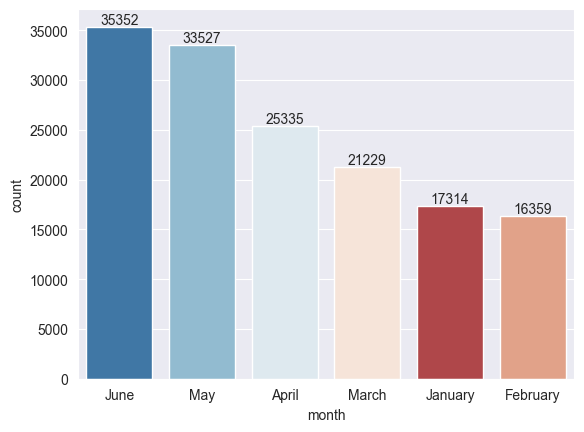

In [17]:
# see number of transactions in each month 

count_plot(x_axis='month', df=df)

The data is presents <b>6 months</b> of sales data.

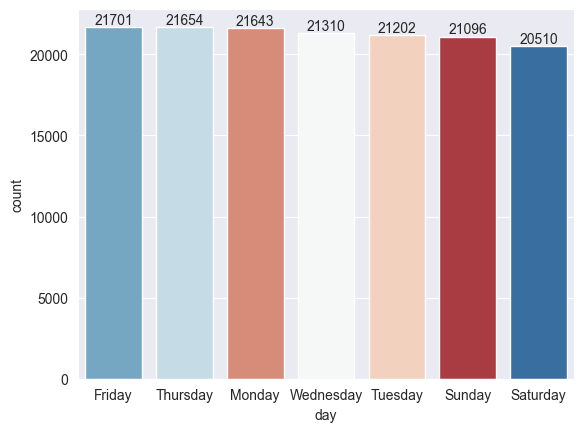

In [18]:
# Daily Distribution Of Transactions 

count_plot(x_axis='day', df=df)

There the difference in total transactions distributed by the day is almost non-existent.

In [19]:

# Extracting Hours from 'transaction_time'

df['hour'] = df['transaction_time'].apply(lambda x : x.hour)

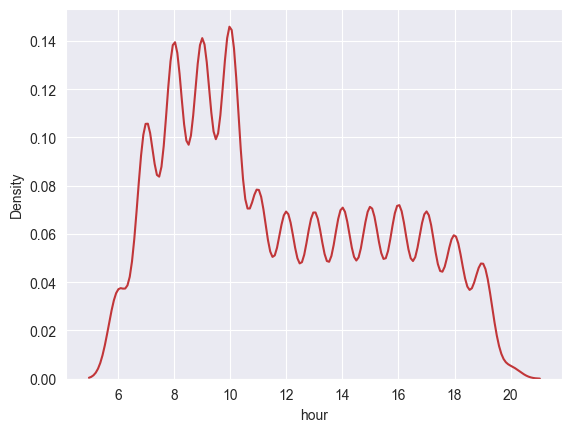

In [20]:
# Peak Hours

sns.kdeplot(df['hour'])
plt.show()

Sales seem to really pickup between <b>8am</b> and <b>11am</b>

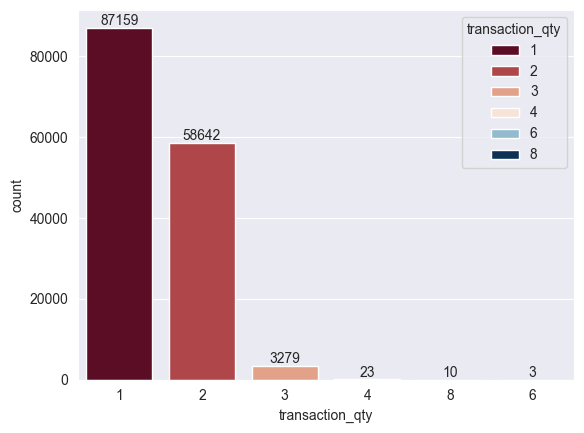

In [21]:
# number of sales quantities

count_plot(x_axis = 'transaction_qty', df = df)

In [22]:
# unique store locations

df['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

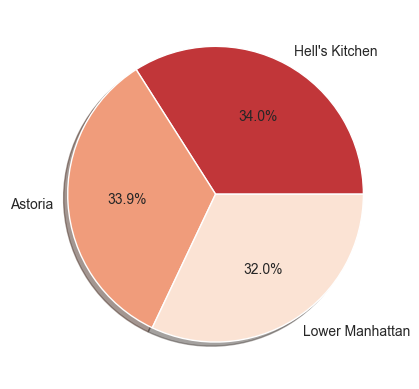

In [23]:
# plot the share of sales by each store

pie_plot(column_name = 'store_location')

<Axes: ylabel='unit_price'>

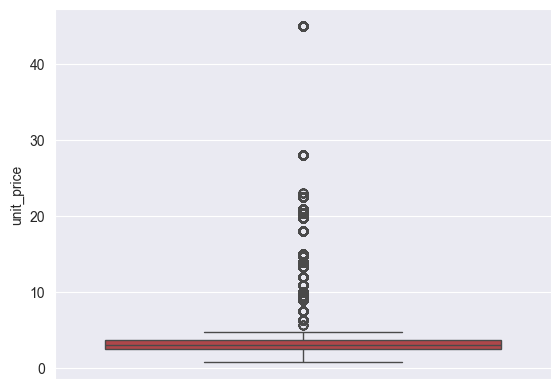

In [24]:
# box plot of unit price to check for outliers

sns.boxplot(y = 'unit_price', data=df)

We can notice the presense of some outliers

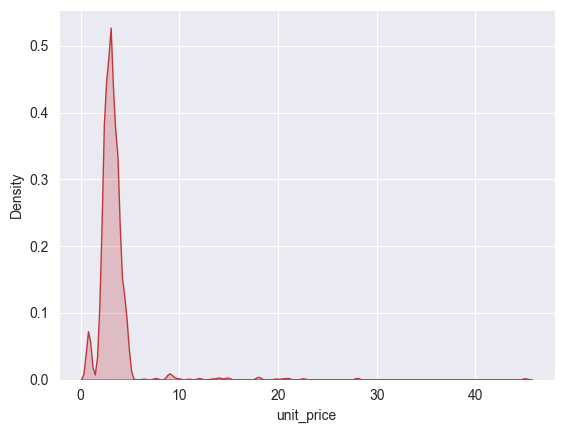

In [25]:
# checking the distribution of 'unit_price'

sns.kdeplot(x = df['unit_price'], fill= True)
plt.show()

The distribution of unit_price is <b>positively skewed</b>. Most of the coffee sales are low-ticket sales while a few sales are high ticket.

In [26]:
# Exploring product category


# Unique values
df['product_category'].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

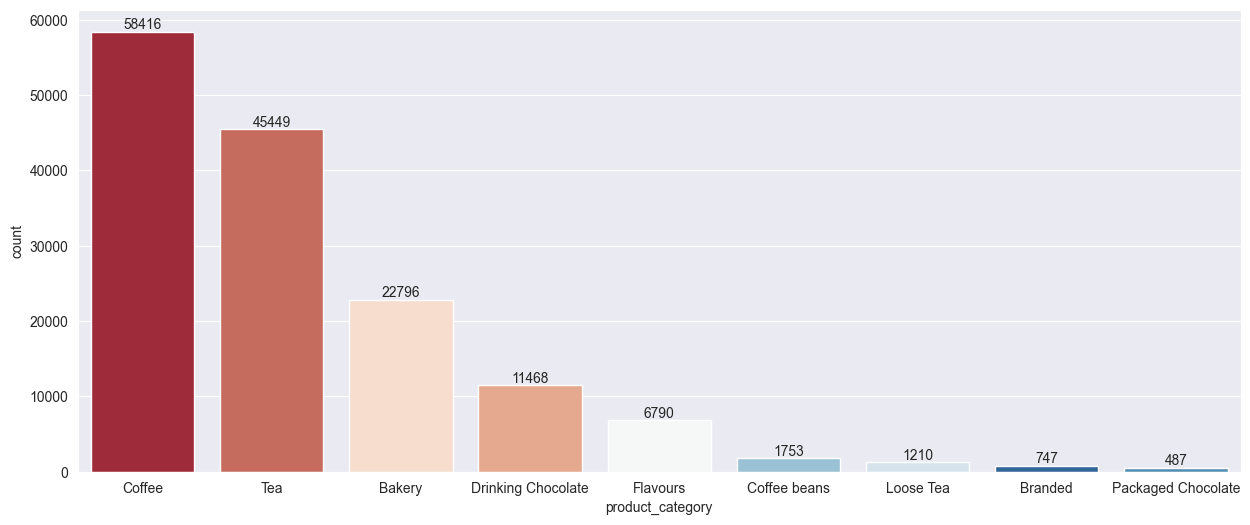

In [27]:
plt.figure(figsize=(15,6))
count_plot(x_axis = 'product_category', df=df)

 There are <b>9</b> product categories with <b>Coffee</b> and <b>Tea</b> showing a high sales rate.

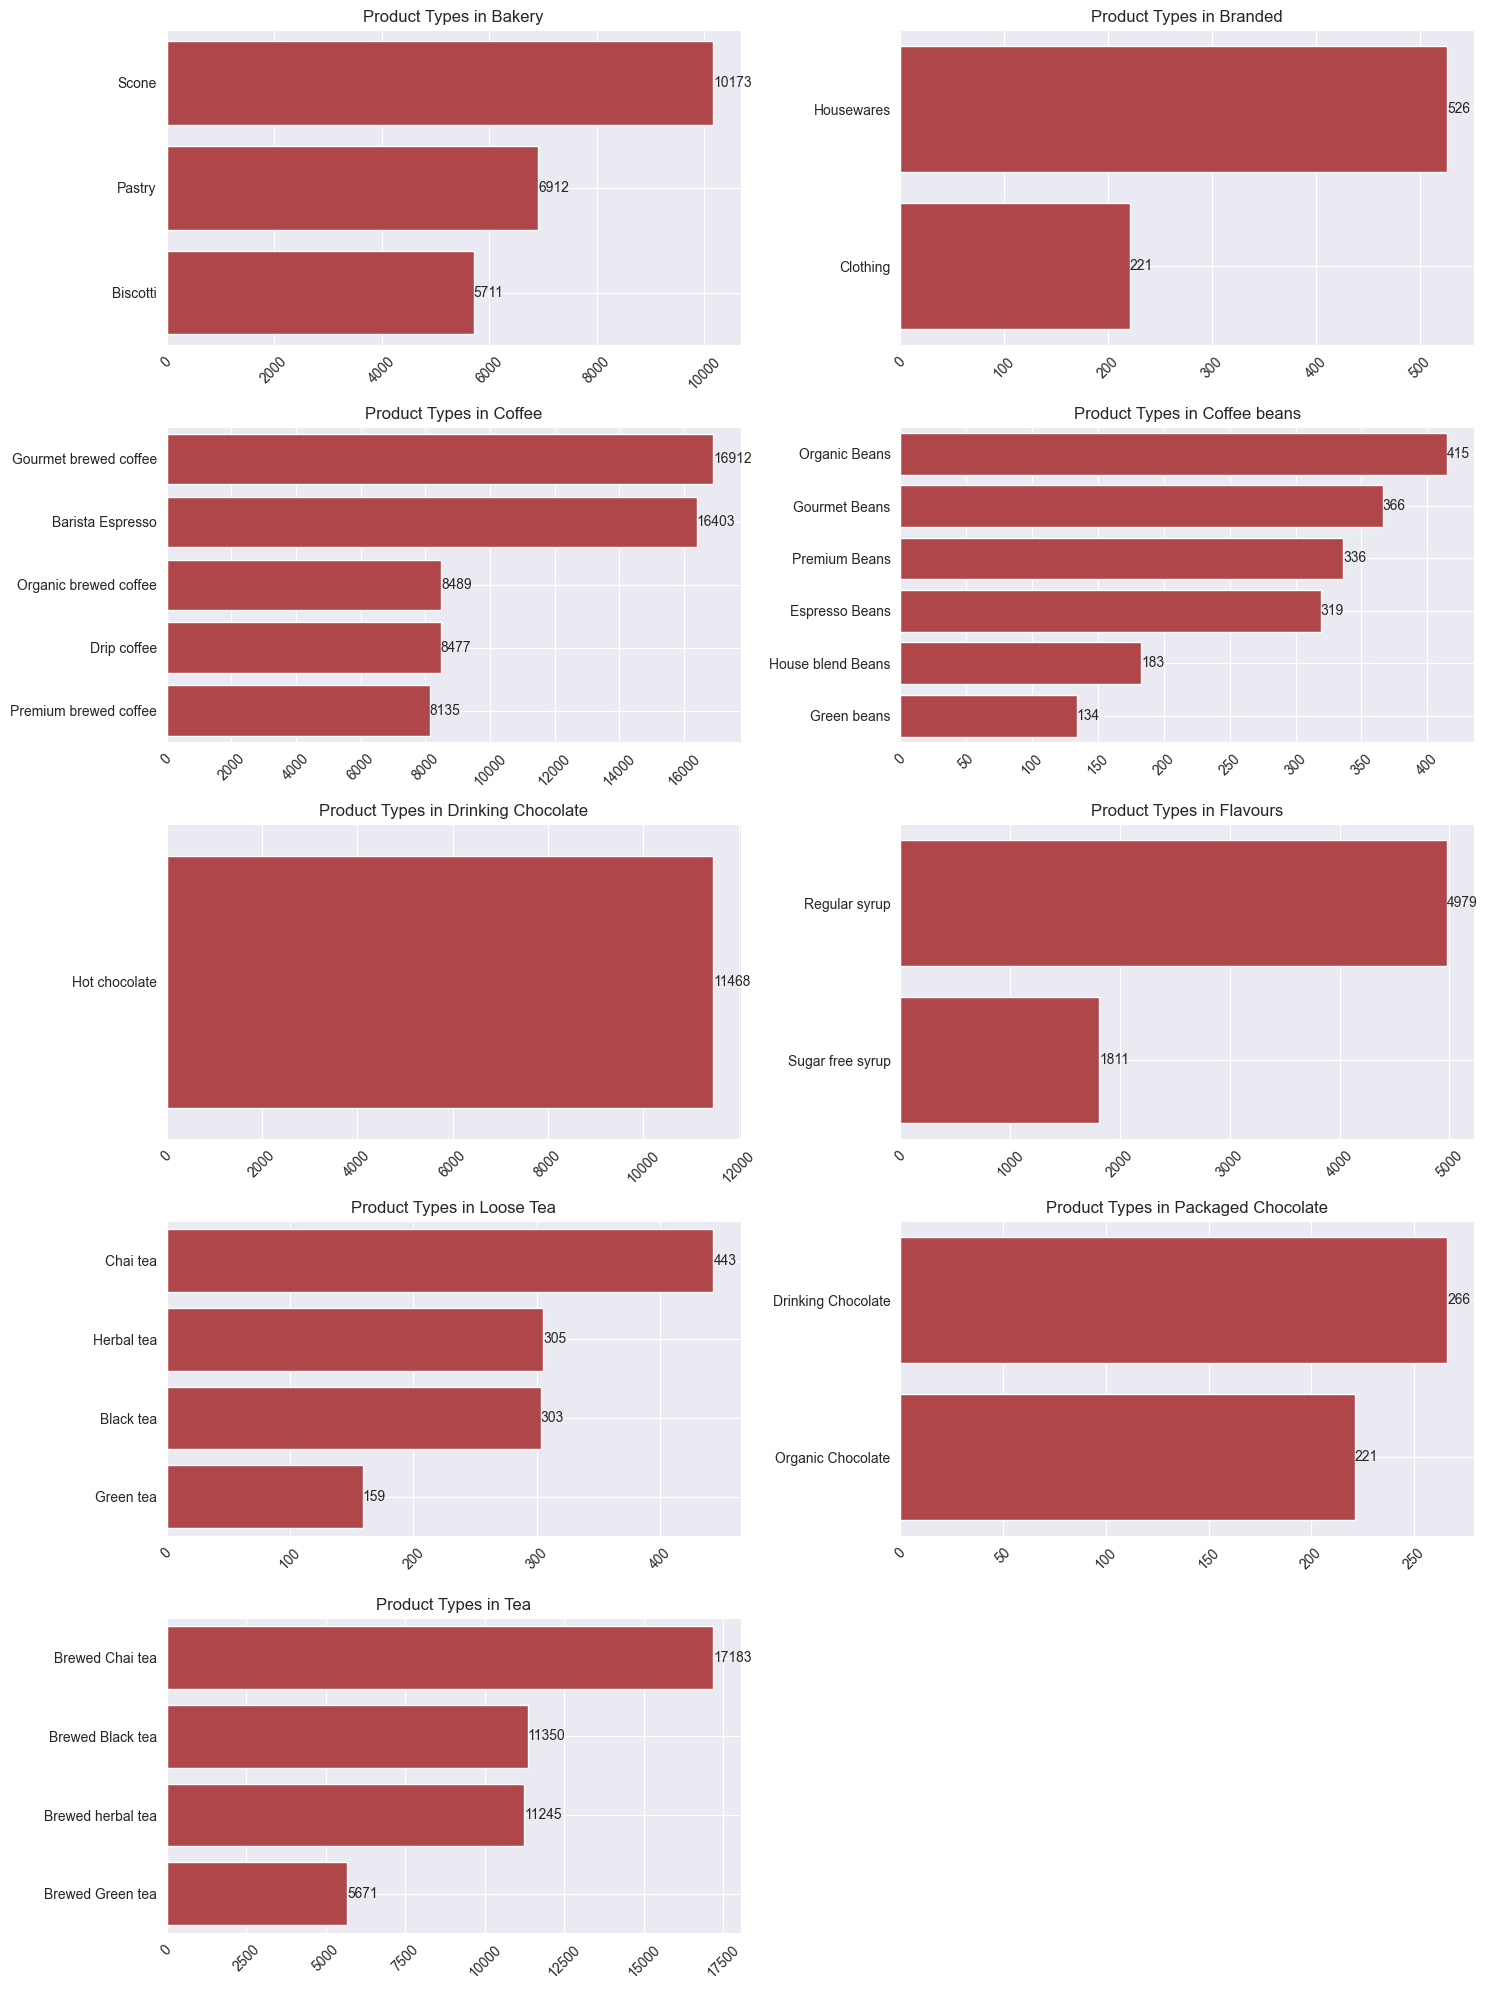

In [28]:



counts = df.groupby(["product_category", "product_type"]).size().reset_index(name = "count")


categories = counts['product_category'].unique()

fig, axes = plt.subplots(5, 2, figsize = (15, 20))


axes = axes.flatten()

for i, category in enumerate(categories):

    subset = counts[counts['product_category'] == category]
    
 
    subset = subset.sort_values('count', ascending = False)
    

    sns.barplot(x = 'count', y = 'product_type', data = subset, ax = axes[i], order = subset['product_type'])
    axes[i].set_title(f'Product Types in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].grid(True)
    
 
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha = 'left', va = 'center')


for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



Highest Selling Products in Each Categories:

Bakery : <b>Scones</b> <br>
Branded : <b>Housewares</b> <br>
Coffee : <b>Gourmet Brewed Coffee</b> <br>
Coffee Beans: <b>Organic Beans</b> <br>
Drinking Chocolate: <b>Hot Chocolate</b> <br>
Regular Syrup: <b>Flavours</b> <br>
Loose Tea: <b>Chai tea</b> <br>
Packaged Chocolate: <b>Drinking Chocolate</b> <br>
Tea: <b>Brewed Chai Tea</b> <br>

In [29]:
# Total Revenue Column

df['Total Revenue'] = df['transaction_qty'] * df['unit_price']


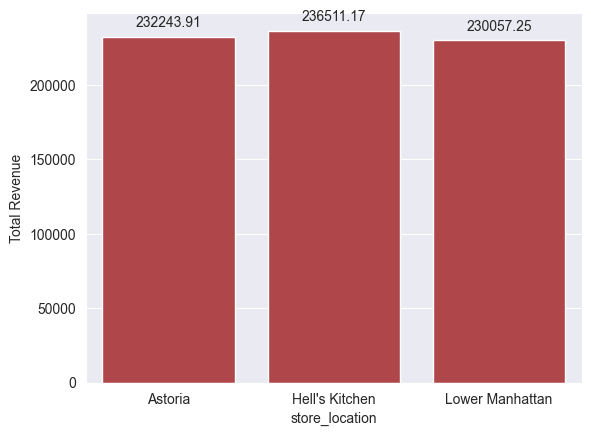

In [64]:
# Revenue according to store location 

revenue = df.groupby('store_location')['Total Revenue'].sum().reset_index()

ax = sns.barplot(x = 'store_location', y = 'Total Revenue', data = revenue)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

As indicated by the bar charts, the revenues of the locations are as follows : <br>

Astoria: 232243.91 <br>
Hell's Kitchen : 236211.17 <br>
Lower Manhattan : 230057.25 <br>


<b>Hell's Kitchen </b> appears to be the best performing location. 

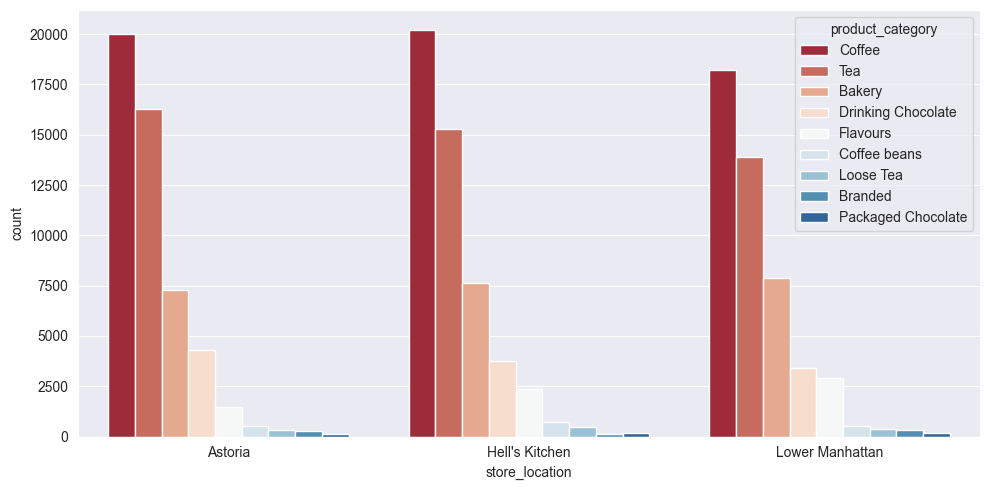

In [73]:
# Performance in various product categories based on store location 

popular_products = df.groupby('store_location')[['product_category']].value_counts().reset_index(name='count')

plt.figure(figsize=(10,5))
sns.barplot(x='store_location', y='count', hue='product_category', data=popular_products, palette= 'RdBu')
plt.tight_layout()
plt.show()

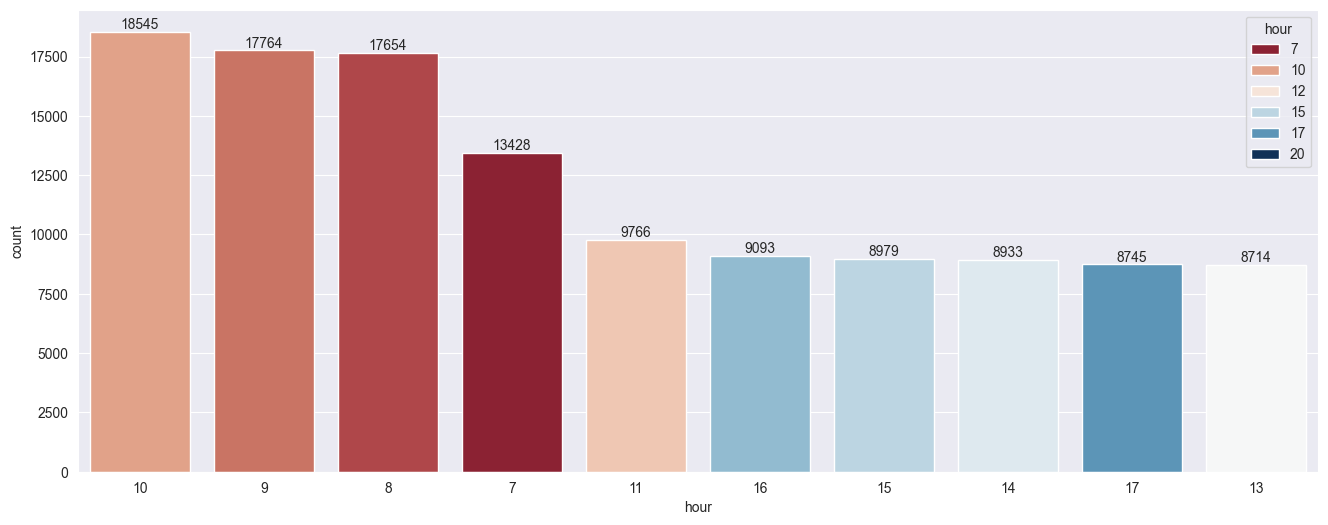

In [77]:
# sort the rows  by hour

plt.figure(figsize=(16,6))
hours = df.sort_values(by='hour')

count_plot(x_axis='hour', hue = 'store_location', top=10, df=hours)

Astoria Store :

    Peak hours are from 9 AM to 10 AM, and from 4 PM to 5 PM, with counts ranging between 5,083 and 5,291 during these periods
    The least busy hours are from 7 AM to 8 AM, with counts ranging between 4,181 and 4,966

     

Hell's Kitchen Store :

    Busiest hours are from 8 AM to 10 AM, with counts ranging between 6,767 and 6,909
    The least busy hours are from 6 AM to 7 AM and from 6 PM to 8 PM

     

Lower Manhattan Store :

    Peak hours are from 9 AM to 10 AM, with a count of 6,297, and from 2 PM to 3 PM, with a count of 3,051
    The least busy hours are from 7 PM to 8 PM, with counts dropping to 75 and 125



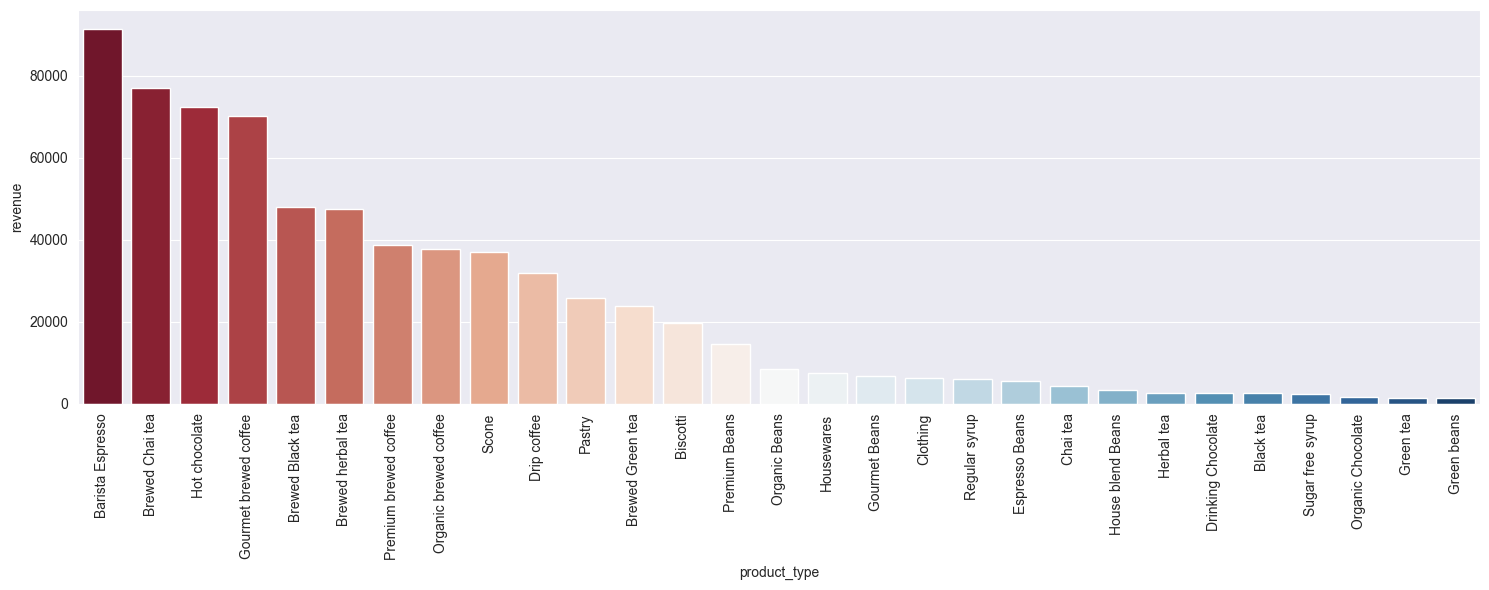

In [84]:
#Revenue By Product Type

category_revenue = df.groupby('product_type')['Total Revenue'].sum().reset_index(name='revenue')

category_revenue = category_revenue.sort_values(by= 'revenue', ascending= False)

plt.figure(figsize=(15,6))

sns.barplot(x = 'product_type', y='revenue', data=category_revenue,hue = 'product_type', palette='RdBu')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: xlabel='month', ylabel='total_revenue'>

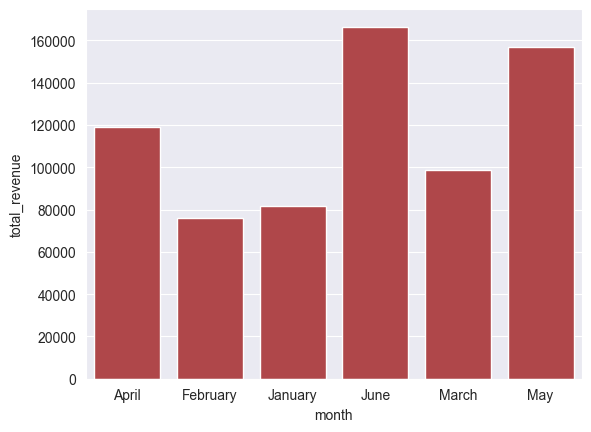

In [93]:
# Monthly Revenue

# Grouping by month and summing the revenue

monthly_revenue = df.groupby('month')['Total Revenue'].sum().reset_index(name= 'total_revenue')
sns.barplot(x = 'month', y = 'total_revenue', data = monthly_revenue)